# **Digit Recognition** 

A compact model to recognize handwritten digits.

Dataset: MNIST Digit Dataset
Training: 60,000 Images (90% Training + 10% Validation)

Testing: 10,000 Images

Trainable Parameters: 7708

Final Evaluation..
Training Accuracy: approx. 99%

Validation Accuracy: >99.4%

Testing Accuracy:  >99.4%


# Load Libraries/Dataset

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)
9


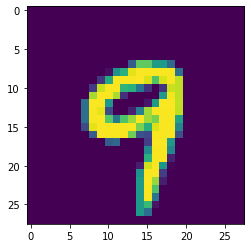

In [0]:
import numpy as np
import pandas as pd
import os
from keras.datasets import mnist
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.reshape(X_train, (60000, 28, 28, 1))
X_test = np.reshape(X_test, (10000, 28, 28, 1))
print(X_train.shape, X_test.shape)

print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

import matplotlib.pyplot as plt
n = 116
print(y_train[n])
plt.imshow(X_train[n,:,:,0])
plt.show()

# Define Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, BatchNormalization, AveragePooling2D
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(8, kernel_size = 3, padding='same', activation = "relu", input_shape = (28, 28, 1)))

model.add(BatchNormalization())
model.add(Conv2D(8, kernel_size = 3, padding='same', activation = "relu"))
model.add(BatchNormalization())

model.add(MaxPool2D(strides=(2,2), padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(12, kernel_size = 3, strides = 1, activation = "relu"))

model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(12, kernel_size = 3, activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(12, kernel_size = 3, activation = "relu"))
model.add(Conv2D(12, kernel_size = 1, strides = 1, activation = "relu"))
model.add(MaxPool2D(strides=(2,2), padding='same'))

model.add(BatchNormalization())
model.add(Conv2D(18, kernel_size = 3, strides = 1, activation = "relu"))

model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(24, kernel_size =1, activation = "relu"))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(10, activation = "softmax"))

## COMPILE
model.compile(optimizer =tf.keras.optimizers.RMSprop(lr=0.00005, rho=0.9, momentum=0.9, epsilon=1e-08, decay=0.001/200),
 loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.summary()
#tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, momentum=0.9, epsilon=1e-08, decay=0.001/200)


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_119 (Conv2D)          (None, 28, 28, 8)         80        
_________________________________________________________________
batch_normalization_118 (Bat (None, 28, 28, 8)         32        
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 28, 28, 8)         584       
_________________________________________________________________
batch_normalization_119 (Bat (None, 28, 28, 8)         32        
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
batch_normalization_120 (Bat (None, 14, 14, 8)         32        
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 12, 12, 12)      

# Training

In [0]:
history = model.fit(X_train[0:54000], y_train[0:54000], validation_data=(X_train[54000:], y_train[54000:]),steps_per_epoch=50, epochs=150, shuffle=False)

Epoch 1/200
50/50 [==============================] - 3s 53ms/step - loss: 2.1320 - accuracy: 0.3281 - val_loss: 1.8073 - val_accuracy: 0.5700
Epoch 2/200
50/50 [==============================] - 2s 47ms/step - loss: 1.0207 - accuracy: 0.6588 - val_loss: 0.8240 - val_accuracy: 0.8483
Epoch 3/200
50/50 [==============================] - 2s 47ms/step - loss: 0.5667 - accuracy: 0.8221 - val_loss: 0.3160 - val_accuracy: 0.9287
Epoch 4/200
50/50 [==============================] - 2s 47ms/step - loss: 0.3651 - accuracy: 0.8866 - val_loss: 0.1535 - val_accuracy: 0.9610
Epoch 5/200
50/50 [==============================] - 2s 48ms/step - loss: 0.2699 - accuracy: 0.9176 - val_loss: 0.1008 - val_accuracy: 0.9720
Epoch 6/200
50/50 [==============================] - 2s 47ms/step - loss: 0.2169 - accuracy: 0.9346 - val_loss: 0.0820 - val_accuracy: 0.9755
Epoch 7/200
50/50 [==============================] - 2s 47ms/step - loss: 0.1859 - accuracy: 0.9442 - val_loss: 0.0722 - val_accuracy: 0.9782
Epoch 

# Testing

In [0]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0180 - accuracy: 0.9944


[0.018014997243881226, 0.9944000244140625]